In [1]:
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd
import re
import numpy as np
from pytictoc import TicToc
from datetime import datetime
import time

In [ ]:
def getAndParseURL(url):
    result = requests.get(url, headers={"User-Agent":"Chrome/103.0.0.0"}) # Safari/537.36. Mozilla/5.0
    soup = bts(result.text, "html.parser")
    return soup

In [ ]:
pages = [] #annual bestsellers&literary fiction
for page in range(1,24): 
    pages.append("https://www.kitapyurdu.com/index.php?route=product/best_sellers&page="+str(page)+"&list_id=18&filter_in_stock=1&filter_in_stock=1")
print(pages[0])
print(pages[-1])
print(len(pages))

In [ ]:
products = []
for page in pages:
    html = getAndParseURL(page)
    for product in html.findAll("div",{"class":"cover"}):
        products.append(product.a.get("href"))
print(products[:25])

In [ ]:
"""
name = html.find("h1",{"class":"pr_header__heading"}).text.strip()
print("name of the book: ", name)
author = html.find("a",{"class":"pr_producers__link"}).text.strip()
print("author: ", author)
publisher = html.find("div",{"class":"pr_producers__publisher"}).text.strip()
print("publisher: ", publisher)
release_date = html.find("div",{"class":"attributes"}).find(text=re.compile("Yayın Tarihi")).findNext().text.strip().replace(".","/")
print("release date: ", release_date)
purchase_info = html.find("div",{"class":"purchase-info"}).text.strip().replace(".","")
print("how many copies of this book have been sold: ", purchase_info)
page_num = html.find("div",{"class":"attributes"}).find(text=re.compile("Sayfa Sayısı:")).findNext().text.strip()
print("number of pages: ", int(page_num))
cover =  html.find("div",{"class":"attributes"}).find(text=re.compile("Cilt Tipi:")).findNext().text.strip()
print("type of the book cover: ", cover)
paper_type = html.find("div",{"class":"attributes"}).find(text=re.compile("Kağıt Cinsi:")).findNext().text.strip()
print("paper type of the book: ", paper_type)
rating = float(html.find("meta", itemprop="ratingValue").attrs["content"].replace(".",""))
print("rating of the book: ", rating)
rating_count = int(html.find("meta", itemprop="ratingCount").attrs["content"].replace(".",""))
print("number of people who rate the book: ", rating_count)
review_count = int(html.find("meta", itemprop="reviewCount").attrs["content"].replace(".",""))
print("number of reviews about the book: ", review_count)
price = float(html.find("div",{"class":"price__item"}).text.strip().replace(",","."))
print("price: ", price)
discount = html.find("p",{"class":"info-text"}).text.replace(",",".")
print("discount: ", discount)
manufacturer_price = float(html.find("span",{"class":"pr_price__strikeout-list"}).text.strip().replace(",","."))
print("original price: ", manufacturer_price)
fav_count = int(html.find("span",{"id":"favorite-count"}).text.strip().replace(".",""))
print("number of people who added the book to their favorites: ", fav_count)
to_read_list = html.find("li",{"class":"readlists__item"}).text.strip("\n").strip().replace(".","")
print("number of people who added the book to their to-read list: ", to_read_list)
"""

In [ ]:
with TicToc():
    features = []
    for product in products:
        html = getAndParseURL(product)
        try:
            name = html.find("h1",{"class":"pr_header__heading"}).text.strip()
        except:
            name = np.nan
        try:
            author = html.find("a",{"class":"pr_producers__link"}).text.strip()
        except:
            author = np.nan
        try:
            publisher = html.find("div",{"class":"pr_producers__publisher"}).text.strip()
        except:
            publisher = np.nan   
        try:
            release_date = html.find("div",{"class":"attributes"}).find(text=re.compile("Yayın Tarihi")).findNext().text.strip().replace(".","/")
        except:
            release_date = np.nan
        try:
            purchase_info = html.find("div",{"class":"purchase-info"}).text.strip().replace(".","")
        except:       
            purchase_info = np.nan
        try:
            page_num = int(html.find("div",{"class":"attributes"}).find(text=re.compile("Sayfa Sayısı:")).findNext().text.strip())
        except:
            page_num = np.nan
        try:
            cover =  html.find("div",{"class":"attributes"}).find(text=re.compile("Cilt Tipi:")).findNext().text.strip()
        except:
            cover = np.nan
        try:
            paper_type = html.find("div",{"class":"attributes"}).find(text=re.compile("Kağıt Cinsi:")).findNext().text.strip()
        except:
            paper_type = np.nan
        try:
            rating = float(html.find("meta", itemprop="ratingValue").attrs["content"].replace(".",""))
        except:
            rating = np.nan
        try:
            rating_count = int(html.find("meta", itemprop="ratingCount").attrs["content"].replace(".",""))
        except:
            rating_count = np.nan
        try:
            review_count = int(html.find("meta", itemprop="reviewCount").attrs["content"].replace(".",""))
        except:
            review_count = np.nan
        try:
            price = float(html.find("div",{"class":"price__item"}).text.strip().replace(",","."))
        except:
            price = np.nan
        try:
            discount = html.find("p",{"class":"info-text"}).text.replace(",",".")
        except:
            discount = np.nan
        try:
            manufacturer_price = float(html.find("span",{"class":"pr_price__strikeout-list"}).text.strip().replace(",","."))
        except:
            manufacturer_price = np.nan
        try:
            fav_count = int(html.find("span",{"id":"favorite-count"}).text.strip().replace(".",""))
        except:
            fav_count = np.nan
        try:
             to_read_list = html.find("li",{"class":"readlists__item"}).text.strip("\n").strip().replace(".","")
        except:
            to_read_list = np.nan


        features.append([name, author, publisher, release_date, purchase_info, page_num, cover, paper_type, 
                         rating, rating_count, review_count, fav_count, to_read_list, price, discount, manufacturer_price])
        time.sleep(1)

    df_columns = ["Name of the Book","Author","Publisher","Release Date","Purchase Info","Number of Pages","Type of the Book Cover",
                  "Type of the Paper","Rate","Rating Count","Review Count","Fav Count","To-Read List Count","Price","Discount","Manufacturer Price"]

    df = pd.DataFrame.from_records(features, columns=df_columns)
    df.to_pickle("./kitap_yurdu_literary.pkl") 

In [ ]:
html = getAndParseURL("https://www.kitapyurdu.com/kitap/gece-yarisi-kutuphanesi/582550.html")
name = html.find("h1",{"class":"pr_header__heading"}).text.strip()
print("Name of the Book: ", name)
author = html.find("a",{"class":"pr_producers__link"}).text.strip()
print("Author: ", author)
publisher = html.find("div",{"class":"pr_producers__publisher"}).text.strip()
print("Publisher: ", publisher)
release_date = html.find("div",{"class":"attributes"}).find(text=re.compile("Yayın Tarihi")).findNext().text.strip().replace(".","/")
print("Release Date: ", release_date)
purchase_info = html.find("div",{"class":"purchase-info"}).text.strip().replace(".","")
print("Purchase Info: ", purchase_info)
page_num = html.find("div",{"class":"attributes"}).find(text=re.compile("Sayfa Sayısı:")).findNext().text.strip()
print("Number of Pages: ", int(page_num))
cover =  html.find("div",{"class":"attributes"}).find(text=re.compile("Cilt Tipi:")).findNext().text.strip()
print("Type of the Book Cover: ", cover)
paper_type = html.find("div",{"class":"attributes"}).find(text=re.compile("Kağıt Cinsi:")).findNext().text.strip()
print("Type of the Paper: ", paper_type)
rating = float(html.find("meta", itemprop="ratingValue").attrs["content"].replace(".",""))
print("Rate: ", rating)
rating_count = int(html.find("meta", itemprop="ratingCount").attrs["content"].replace(".",""))
print("Rating Count: ", rating_count)
review_count = int(html.find("meta", itemprop="reviewCount").attrs["content"].replace(".",""))
print("Review Count: ", review_count)
fav_count = int(html.find("span",{"id":"favorite-count"}).text.strip().replace(".",""))
print("Fav Count: ", fav_count)
to_read_list = html.find("li",{"class":"readlists__item"}).text.strip("\n").strip().replace(".","")
print("To-Read List Count: ", to_read_list)
price = float(html.find("div",{"class":"price__item"}).text.strip().replace(",","."))
print("Price: ", price)
discount = html.find("p",{"class":"info-text"}).text.replace(",",".")
print("Discount: ", discount)
manufacturer_price = float(html.find("span",{"class":"pr_price__strikeout-list"}).text.strip().replace(",","."))
print("Manufacturer Price: ", manufacturer_price)

In [ ]:
pages = [] #çok satanlar-edebiyatdışı-yıllık
for page in range(1,23): 
    pages.append("https://www.kitapyurdu.com/index.php?route=product/best_sellers&page="+str(page)+"&list_id=21&filter_in_stock=1&filter_in_stock=1")
print(pages[0])
print(pages[-1])
print(len(pages))


In [ ]:
products = []
for page in pages:
    html = getAndParseURL(page)
    for product in html.findAll("div",{"class":"cover"}):
        products.append(product.a.get("href"))
print(products[:25])

In [ ]:
with TicToc():
    features = []
    for product in products:
        html = getAndParseURL(product)
        try:
            name = html.find("h1",{"class":"pr_header__heading"}).text.strip()
        except:
            name = np.nan
        try:
            author = html.find("a",{"class":"pr_producers__link"}).text.strip()
        except:
            author = np.nan
        try:
            publisher = html.find("div",{"class":"pr_producers__publisher"}).text.strip()
        except:
            publisher = np.nan   
        try:
            release_date = html.find("div",{"class":"attributes"}).find(text=re.compile("Yayın Tarihi")).findNext().text.strip().replace(".","/")
        except:
            release_date = np.nan
        try:
            purchase_info = html.find("div",{"class":"purchase-info"}).text.strip().replace(".","")
        except:       
            purchase_info = np.nan
        try:
            page_num = int(html.find("div",{"class":"attributes"}).find(text=re.compile("Sayfa Sayısı:")).findNext().text.strip())
        except:
            page_num = np.nan
        try:
            cover =  html.find("div",{"class":"attributes"}).find(text=re.compile("Cilt Tipi:")).findNext().text.strip()
        except:
            cover = np.nan
        try:
            paper_type = html.find("div",{"class":"attributes"}).find(text=re.compile("Kağıt Cinsi:")).findNext().text.strip()
        except:
            paper_type = np.nan
        try:
            rating = float(html.find("meta", itemprop="ratingValue").attrs["content"].replace(".",""))
        except:
            rating = np.nan
        try:
            rating_count = int(html.find("meta", itemprop="ratingCount").attrs["content"].replace(".",""))
        except:
            rating_count = np.nan
        try:
            review_count = int(html.find("meta", itemprop="reviewCount").attrs["content"].replace(".",""))
        except:
            review_count = np.nan
        try:
            price = float(html.find("div",{"class":"price__item"}).text.strip().replace(",","."))
        except:
            price = np.nan
        try:
            discount = html.find("p",{"class":"info-text"}).text.replace(",",".")
        except:
            discount = np.nan
        try:
            manufacturer_price = float(html.find("span",{"class":"pr_price__strikeout-list"}).text.strip().replace(",","."))
        except:
            manufacturer_price = np.nan
        try:
            fav_count = int(html.find("span",{"id":"favorite-count"}).text.strip().replace(".",""))
        except:
            fav_count = np.nan
        try:
             to_read_list = html.find("li",{"class":"readlists__item"}).text.strip("\n").strip().replace(".","")
        except:
            to_read_list = np.nan


        features.append([name, author, publisher, release_date, purchase_info, page_num, cover, paper_type, 
                         rating, rating_count, review_count, fav_count, to_read_list, price, discount, manufacturer_price])
        time.sleep(1)

    df_columns = ["Name of the book","Author","Publisher","Release Date","Purchase Info","Number of Pages","Type of the Book Cover",
                  "Type of the Paper","Rate","Rating Count","Review Count","Fav Count","To-Read List Count","Price","Discount","Manufacturer Price"]

    df = pd.DataFrame.from_records(features, columns=df_columns)
    df.to_pickle("./kitap_yurdu_edebiyat_disi.pkl") 

In [2]:
with TicToc():
    ky_ed = pd.read_pickle("./kitap_yurdu_edebiyat_disi.pkl") 
    ky = pd.read_pickle("./kitap_yurdu.pkl") 


Elapsed time is 0.003483 seconds.


In [3]:
ky = ky.append(ky_ed, ignore_index=True)

C:\Users\sarif\AppData\Local\Temp\ipykernel_10124\3144410015.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ky = ky.append(ky_ed, ignore_index=True)


In [4]:
ky.head(10)

,Name of the book,Author,Publisher,Release Date,Purchase Info,Number of Pages,Type of the Book Cover,Type of the Paper,Rate,Rating Count,Review Count,Fav Count,To-Read List Count,Price,Discount,Manufacturer Price
0,Gece Yarısı Kütüphanesi,Matt Haig,DOMİNGO YAYINEVİ,23/02/2022,Bu üründen 38719 adet satın alınmıştır,283.0,Karton Kapak,Kitap Kağıdı,5.0,998,616,19635,Okuyacağım \n\n\n ...,41.81,Kazancınız: 34.19,76.0
1,Şeker Portakalı (Ciltsiz),Jose Mauro De Vasconcelos,CAN YAYINLARI,06/09/2019,Bu üründen 266852 adet satın alınmıştır,182.0,Karton Kapak,Kitap Kağıdı,5.0,21848,10075,60358,Okuyacağım \n\n\n ...,24.75,Kazancınız: 30.25,55.0
2,Simyacı (Ciltsiz),Paulo Coelho,CAN YAYINLARI,28/09/2021,Bu üründen 183205 adet satın alınmıştır,184.0,Karton Kapak,Kitap Kağıdı,5.0,15914,7543,54657,Okuyacağım \n\n\n ...,25.66,Kazancınız: 31.34,57.0
3,"Ben, Kirke",Madeline Miller,İTHAKİ YAYINLARI,25/01/2021,Bu üründen 50093 adet satın alınmıştır,408.0,Karton Kapak,Kitap Kağıdı,4.0,1703,912,24116,Okuyacağım \n\n\n ...,40.01,Kazancınız: 39.99,80.0
4,Fareler ve İnsanlar,John Steinbeck,SEL YAYINCILIK,21/05/2020,Bu üründen 126422 adet satın alınmıştır,111.0,Karton Kapak,Kitap Kağıdı,5.0,9631,4416,41801,Okuyacağım \n\n\n ...,22.66,Kazancınız: 13.34,36.0
5,Hayvan Çiftliği (Ciltsiz),George Orwell,CAN YAYINLARI,04/10/2019,Bu üründen 198879 adet satın alınmıştır,152.0,Karton Kapak,Kitap Kağıdı,5.0,18935,8711,42948,Okuyacağım \n\n\n ...,9.90,Kazancınız: 12.10,22.0
6,Kayıp Tanrılar Ülkesi,Ahmet Ümit,YAPI KREDİ YAYINLARI,13/07/2022,Bu üründen 29999 adet satın alınmıştır,504.0,Karton Kapak,Kitap Kağıdı,5.0,835,521,9558,Okuyacağım \n\n\n ...,46.76,Kazancınız: 38.24,85.0
7,Kırmızı Pazartesi,Gabriel Garcia Marquez,CAN YAYINLARI,15/04/2019,Bu üründen 109415 adet satın alınmıştır,120.0,Karton Kapak,Kitap Kağıdı,4.0,9963,4356,37675,Okuyacağım \n\n\n ...,18.08,Kazancınız: 21.92,40.0
8,Veronika Ölmek İstiyor,Paulo Coelho,CAN YAYINLARI,06/08/2019,Bu üründen 63613 adet satın alınmıştır,198.0,Karton Kapak,Kitap Kağıdı,5.0,3713,1905,33938,Okuyacağım \n\n\n ...,35.76,Kazancınız: 29.24,65.0
9,Cesur Yeni Dünya,Aldous Huxley,İTHAKİ YAYINLARI,20/08/2021,Bu üründen 110525 adet satın alınmıştır,272.0,Karton Kapak,Kitap Kağıdı,5.0,6779,3123,37432,Okuyacağım \n\n\n ...,27.96,Kazancınız: 37.04,65.0


In [5]:
def split_int(string):
    for i in string.split():
        try:
            str_to_num = int(i)
            return str_to_num
        except ValueError:
            pass

In [6]:
def split_float(string):
    for i in string.split():
        try:
            str_to_num = float(i)
            return str_to_num
        except ValueError:
            pass

In [7]:
ky["Purchase Info"] = ky.loc[ky["Purchase Info"].notnull(), "Purchase Info"].apply(split_int)


In [8]:
ky["Discount"] = ky.loc[ky["Discount"].notnull(), "Discount"].apply(split_float)

In [9]:
ky["To-Read List Count"] = ky.loc[ky["To-Read List Count"].notnull(), "To-Read List Count"].apply(split_int)

In [10]:
ky.drop_duplicates(inplace=True) 

In [11]:
ky["Type of the Book Cover"].unique()

array(['Karton Kapak', 'Ciltli', nan], dtype=object)

In [12]:
book_cover_dict = { 'Karton Kapak':1, 'Ciltli':2}
ky["Type of the Book Cover"] = ky["Type of the Book Cover"].map(book_cover_dict)
ky["Type of the Book Cover"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
879    1.0
880    1.0
881    1.0
882    NaN
883    1.0
Name: Type of the Book Cover, Length: 884, dtype: float64

In [13]:
ky["Type of the Paper"].unique()

array(['Kitap Kağıdı', '3. Hm. Kağıt', '2. Hm. Kağıt', '1. Hm. Kağıt',
       'Kuşe Kağıt', nan], dtype=object)

In [14]:
paper_dict = { 'Kitap Kağıdı':2,
                '2. Hm. Kağıt':2,
                '1. Hm. Kağıt':3,                  
                '3. Hm. Kağıt':1,
                'Kuşe Kağıt':4 }

In [15]:
# label encoding for paper type
ky['Type of the Paper'] = ky['Type of the Paper'].map(paper_dict)
ky['Type of the Paper']

0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
879    2.0
880    2.0
881    2.0
882    NaN
883    2.0
Name: Type of the Paper, Length: 884, dtype: float64

In [16]:
"""rd = datetime.strptime(release_date, "%d/%m/%Y").date()
today = datetime.now().date()
time_since_publ = (today-rd).days
print(time_since_publ)"""

'rd = datetime.strptime(release_date, "%d/%m/%Y").date()\ntoday = datetime.now().date()\ntime_since_publ = (today-rd).days\nprint(time_since_publ)'

In [17]:
type(ky.loc[0,'Release Date'])

str

In [18]:
today = datetime.now().date()
def time_passed(release_date):   
    rd = datetime.strptime(release_date, "%d/%m/%Y").date()
    time_since_publ = (today-rd).days
    return(time_since_publ)

In [19]:
ky['Time Passed Since Publication'] = ky.loc[ky["Release Date"].notnull(), "Release Date"].apply(time_passed)

In [20]:
ky = ky.loc[:,ky.columns != "Release Date"]

In [21]:
ky.columns

Index(['Name of the book', 'Author', 'Publisher', 'Purchase Info',
       'Number of Pages', 'Type of the Book Cover', 'Type of the Paper',
       'Rate', 'Rating Count', 'Review Count', 'Fav Count',
       'To-Read List Count', 'Price', 'Discount', 'Manufacturer Price',
       'Time Passed Since Publication'],
      dtype='object')

In [22]:
ky_lr = ky.loc[:, ~ky.columns.isin(["Name of the book","Author","Publisher"])]

In [23]:
ky_lr.head(10)

,Purchase Info,Number of Pages,Type of the Book Cover,Type of the Paper,Rate,Rating Count,Review Count,Fav Count,To-Read List Count,Price,Discount,Manufacturer Price,Time Passed Since Publication
0,38719.0,283.0,1.0,2.0,5.0,998,616,19635,2093.0,41.81,34.19,76.0,195.0
1,266852.0,182.0,1.0,2.0,5.0,21848,10075,60358,7789.0,24.75,30.25,55.0,1096.0
2,183205.0,184.0,1.0,2.0,5.0,15914,7543,54657,5425.0,25.66,31.34,57.0,343.0
3,50093.0,408.0,1.0,2.0,4.0,1703,912,24116,2157.0,40.01,39.99,80.0,589.0
4,126422.0,111.0,1.0,2.0,5.0,9631,4416,41801,4330.0,22.66,13.34,36.0,838.0
5,198879.0,152.0,1.0,2.0,5.0,18935,8711,42948,6065.0,9.90,12.10,22.0,1068.0
6,29999.0,504.0,1.0,2.0,5.0,835,521,9558,1502.0,46.76,38.24,85.0,55.0
7,109415.0,120.0,1.0,2.0,4.0,9963,4356,37675,4491.0,18.08,21.92,40.0,1240.0
8,63613.0,198.0,1.0,2.0,5.0,3713,1905,33938,2803.0,35.76,29.24,65.0,1127.0
9,110525.0,272.0,1.0,2.0,5.0,6779,3123,37432,4577.0,27.96,37.04,65.0,382.0


In [24]:
ky_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 883
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Purchase Info                  881 non-null    float64
 1   Number of Pages                874 non-null    float64
 2   Type of the Book Cover         881 non-null    float64
 3   Type of the Paper              880 non-null    float64
 4   Rate                           884 non-null    float64
 5   Rating Count                   884 non-null    int64  
 6   Review Count                   884 non-null    int64  
 7   Fav Count                      884 non-null    int64  
 8   To-Read List Count             881 non-null    float64
 9   Price                          884 non-null    float64
 10  Discount                       884 non-null    float64
 11  Manufacturer Price             879 non-null    float64
 12  Time Passed Since Publication  882 non-null    flo

In [25]:
len(ky_lr)

884

In [26]:
ky_lr[ky_lr['Number of Pages'].isnull()].index.tolist()

[303, 412, 647, 788, 795, 797, 817, 840, 847, 882]

In [27]:
ky_lr = ky_lr.drop(labels=[303, 412, 647, 788, 795, 797, 817, 840, 847, 882], axis=0)

In [28]:
ky_lr[ky_lr['Time Passed Since Publication'].isnull()].index.tolist()

[603, 811]

In [29]:
ky_lr = ky_lr.drop(labels=[603, 811], axis=0)

In [30]:
def mean_std_filling(column_name):    
    mean = column_name.mean()
    std = column_name.std()
    is_null = column_name.isna().sum()
    print('Mean:', mean, 'Std:', std, 'Null:', is_null)
    rand_float = np.random.uniform(0, mean + std, size = is_null)
    print('Numbers:', rand_float[:25])

    column_name[np.isnan(column_name)] = rand_float
    column_name = column_name.astype(float)

In [31]:
mean_std_filling(ky_lr['Manufacturer Price'])

Mean: 61.2080276816609 Std: 41.5052731245649 Null: 5
Numbers: [ 1.49565482  2.97348893 63.52561104 59.62367486 69.85717763]


C:\Users\sarif\AppData\Local\Temp\ipykernel_10124\3313111538.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_name[np.isnan(column_name)] = rand_float


In [32]:
ky_lr[ky_lr['Type of the Paper'].isnull()].index.tolist()

[684]

In [33]:
ky_lr.loc[684,'Type of the Paper'] = 2

In [34]:
ky_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 883
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Purchase Info                  872 non-null    float64
 1   Number of Pages                872 non-null    float64
 2   Type of the Book Cover         872 non-null    float64
 3   Type of the Paper              872 non-null    float64
 4   Rate                           872 non-null    float64
 5   Rating Count                   872 non-null    int64  
 6   Review Count                   872 non-null    int64  
 7   Fav Count                      872 non-null    int64  
 8   To-Read List Count             872 non-null    float64
 9   Price                          872 non-null    float64
 10  Discount                       872 non-null    float64
 11  Manufacturer Price             872 non-null    float64
 12  Time Passed Since Publication  872 non-null    flo

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = ky_lr.loc[:,ky_lr.columns != "Price"]
y = ky_lr.Price
# Train/Test 
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train/Validation 
x_train, x_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [37]:
print('X Train:', x_train.shape)
print('X Validation:', x_cv.shape)
print('X test:', x_test.shape)

X Train: (557, 12)
X Validation: (140, 12)
X test: (175, 12)


In [38]:
from sklearn.linear_model import LinearRegression

# Model Construction
lreg = LinearRegression()

lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

# MSE 
mse = np.mean((pred - y_cv)**2)
print("MSE: ", mse)

# R2 Score
print("R2 Score: ", lreg.score(x_cv, y_cv))

MSE:  22.076270063961136
R2 Score:  0.9687743271787526


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
def extract_whiskers(data):
    median_value = np.median(data) # Median
    upper_quartile = np.percentile(data, 75) # 75%
    lower_quartile = np.percentile(data, 25) # 25% 

    iqr = upper_quartile - lower_quartile # Interquartile Range
    upper = data[data<=upper_quartile+1.5*iqr].max()
    print("Upper Whisker:", data[data<=upper_quartile+1.5*iqr].max()) # Max
    #print("Lower Whisker:", data[data>=lower_quartile-1.5*iqr].min()) # Min
    return upper


In [41]:
ky_lr.columns

Index(['Purchase Info', 'Number of Pages', 'Type of the Book Cover',
       'Type of the Paper', 'Rate', 'Rating Count', 'Review Count',
       'Fav Count', 'To-Read List Count', 'Price', 'Discount',
       'Manufacturer Price', 'Time Passed Since Publication'],
      dtype='object')

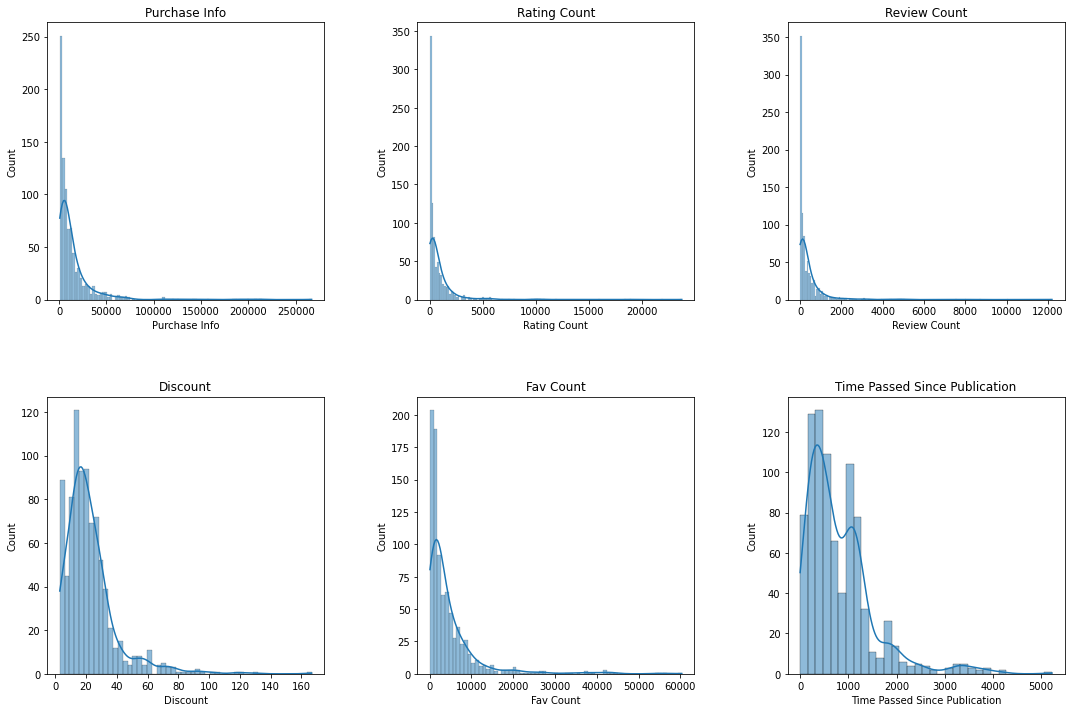

In [42]:
fig, axes = plt.subplots(2, 3)
sns.histplot(data = ky_lr['Purchase Info'], kde=True, ax=axes[0,0]).set_title("Purchase Info")
sns.histplot(data = ky_lr['Rating Count'], kde=True, ax=axes[0,1]).set_title("Rating Count")
sns.histplot(data = ky_lr['Review Count'], kde=True, ax=axes[0,2]).set_title("Review Count")
sns.histplot(data = ky_lr['Discount'], kde=True, ax=axes[1,0]).set_title("Discount")
sns.histplot(data = ky_lr['Fav Count'], kde=True, ax=axes[1,1]).set_title("Fav Count")
sns.histplot(data = ky_lr['Time Passed Since Publication'], kde=True, ax=axes[1,2]).set_title("Time Passed Since Publication")


fig.set_figheight(10)
fig.set_figwidth(15)
fig.tight_layout(h_pad=5, w_pad=5)

In [43]:
extract_whiskers(ky_lr['Purchase Info'])

Upper Whisker: 34591.0


34591.0

In [44]:
pi = extract_whiskers(ky_lr['Purchase Info'])
rac = extract_whiskers(ky_lr['Rating Count'])
rec = extract_whiskers(ky_lr['Review Count'])
dc = extract_whiskers(ky_lr['Discount'])
fc = extract_whiskers(ky_lr['Fav Count'])
tsp = extract_whiskers(ky_lr['Time Passed Since Publication'])

Upper Whisker: 34591.0
Upper Whisker: 2018
Upper Whisker: 967
Upper Whisker: 50.07
Upper Whisker: 11874
Upper Whisker: 2232.0


In [45]:
ky_lr = ky_lr.loc[ky_lr['Purchase Info'] <= pi]
ky_lr = ky_lr.loc[ky_lr['Rating Count'] <= rac]
ky_lr = ky_lr.loc[ky_lr['Review Count'] <= rec]
ky_lr = ky_lr.loc[ky_lr['Discount'] <= dc]
ky_lr = ky_lr.loc[ky_lr['Fav Count'] <= fc]
ky_lr = ky_lr.loc[ky_lr['Time Passed Since Publication'] <= tsp]


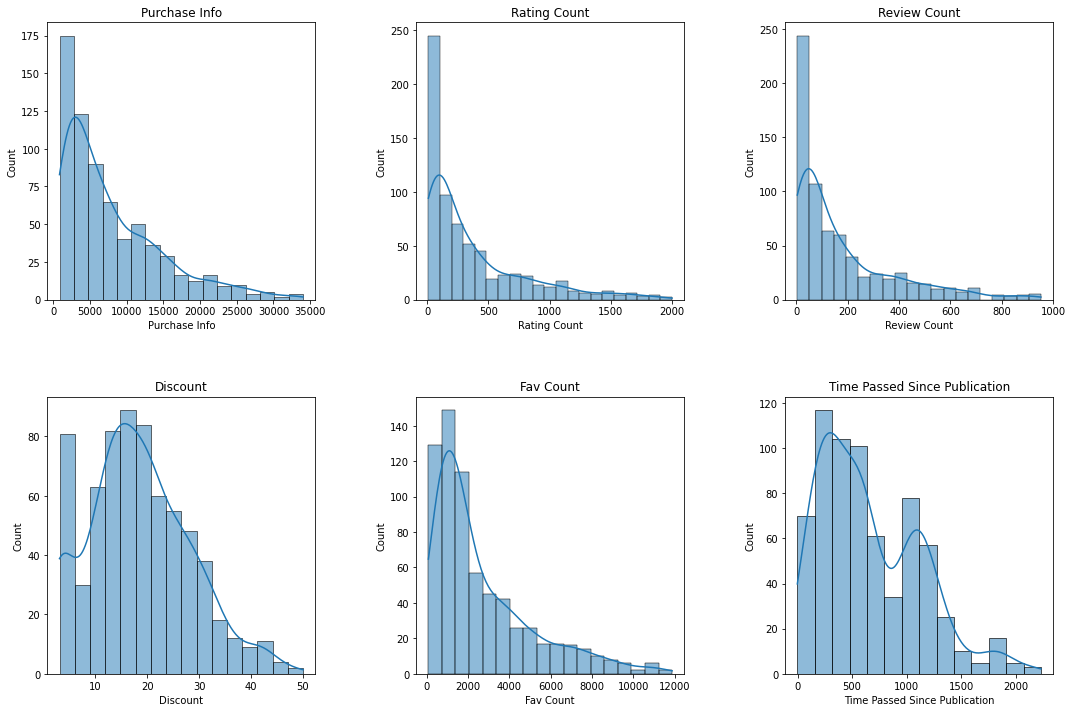

In [46]:
fig, axes = plt.subplots(2, 3)
sns.histplot(data = ky_lr['Purchase Info'], kde=True, ax=axes[0,0]).set_title("Purchase Info")
sns.histplot(data = ky_lr['Rating Count'], kde=True, ax=axes[0,1]).set_title("Rating Count")
sns.histplot(data = ky_lr['Review Count'], kde=True, ax=axes[0,2]).set_title("Review Count")
sns.histplot(data = ky_lr['Discount'], kde=True, ax=axes[1,0]).set_title("Discount")
sns.histplot(data = ky_lr['Fav Count'], kde=True, ax=axes[1,1]).set_title("Fav Count")
sns.histplot(data = ky_lr['Time Passed Since Publication'], kde=True, ax=axes[1,2]).set_title("Time Passed Since Publication")


fig.set_figheight(10)
fig.set_figwidth(15)
fig.tight_layout(h_pad=5, w_pad=5)

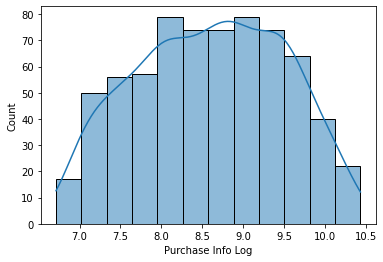

In [47]:
ky_lr['Purchase Info Log'] = np.log(ky_lr['Purchase Info'])
sns.histplot(data = ky_lr['Purchase Info Log'], kde=True);

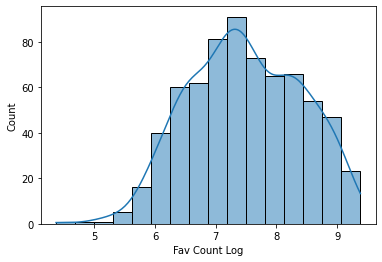

In [48]:
ky_lr['Fav Count Log'] = np.log(ky_lr['Fav Count'])
sns.histplot(data = ky_lr['Fav Count Log'], kde=True);

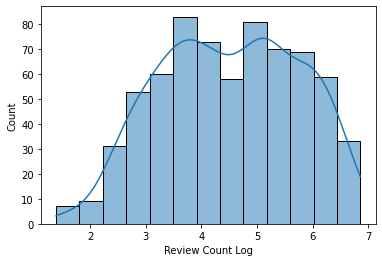

In [49]:
ky_lr['Review Count Log'] = np.log(ky_lr['Review Count'])
sns.histplot(data = ky_lr['Review Count Log'], kde=True);

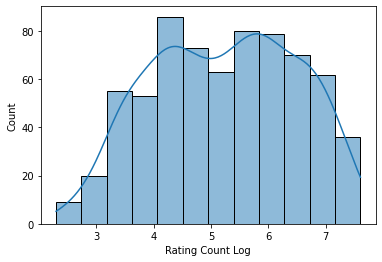

In [50]:
ky_lr['Rating Count Log'] = np.log(ky_lr['Rating Count'])
sns.histplot(data = ky_lr['Rating Count Log'], kde=True);

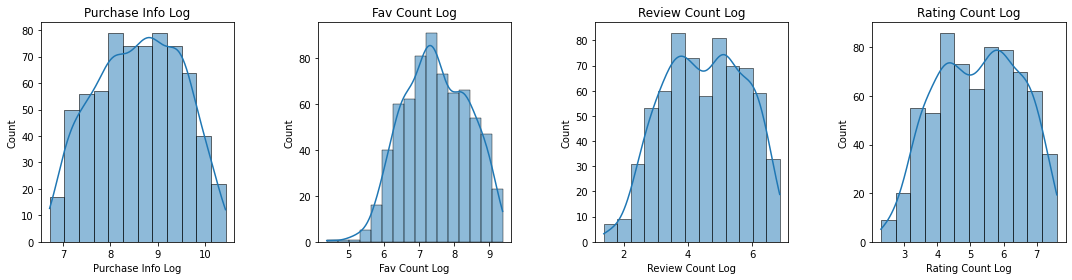

In [52]:
fig, axes = plt.subplots(1, 4)
sns.histplot(data = ky_lr['Purchase Info Log'], kde=True, ax=axes[0]).set_title("Purchase Info Log");
sns.histplot(data = ky_lr['Fav Count Log'], kde=True, ax=axes[1]).set_title("Fav Count Log");
sns.histplot(data = ky_lr['Review Count Log'], kde=True, ax=axes[2]).set_title("Review Count Log");
sns.histplot(data = ky_lr['Rating Count Log'], kde=True, ax=axes[3]).set_title("Rating Count Log");

fig.set_figheight(4)
fig.set_figwidth(15)
fig.tight_layout(h_pad=5, w_pad=5)


In [53]:
ky_lr = ky_lr.drop(["Purchase Info","Fav Count", "Review Count","Rating Count"], axis=1)


In [54]:
ky_lr

,Number of Pages,Type of the Book Cover,Type of the Paper,Rate,To-Read List Count,Price,Discount,Manufacturer Price,Time Passed Since Publication,Purchase Info Log,Fav Count Log,Review Count Log,Rating Count Log
6,504.0,1.0,2.0,5.0,1502.0,46.76,38.24,85.0,55.0,10.308919,9.165134,6.255750,6.727432
23,168.0,1.0,2.0,4.0,431.0,24.77,30.23,55.0,348.0,9.095827,8.302514,4.905275,5.505332
25,376.0,1.0,2.0,5.0,730.0,39.01,38.99,78.0,55.0,9.707716,9.149422,5.648974,6.386879
26,140.0,1.0,2.0,5.0,732.0,38.50,15.50,54.0,462.0,9.953087,8.754319,5.817111,6.269096
27,160.0,1.0,2.0,4.0,432.0,27.01,17.99,45.0,203.0,9.080573,8.117014,4.919981,5.497168
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,40.0,1.0,2.0,5.0,64.0,33.00,22.00,55.0,1000.0,8.499233,7.141245,4.820282,5.298317
878,264.0,1.0,2.0,5.0,261.0,51.81,26.69,78.5,1077.0,9.137662,8.020599,5.214936,5.855072
880,144.0,1.0,2.0,5.0,162.0,33.00,17.00,50.0,454.0,8.788441,7.554335,5.384495,6.006353
881,143.0,1.0,2.0,5.0,100.0,38.61,19.89,58.5,914.0,8.040769,7.015712,4.234107,4.844187


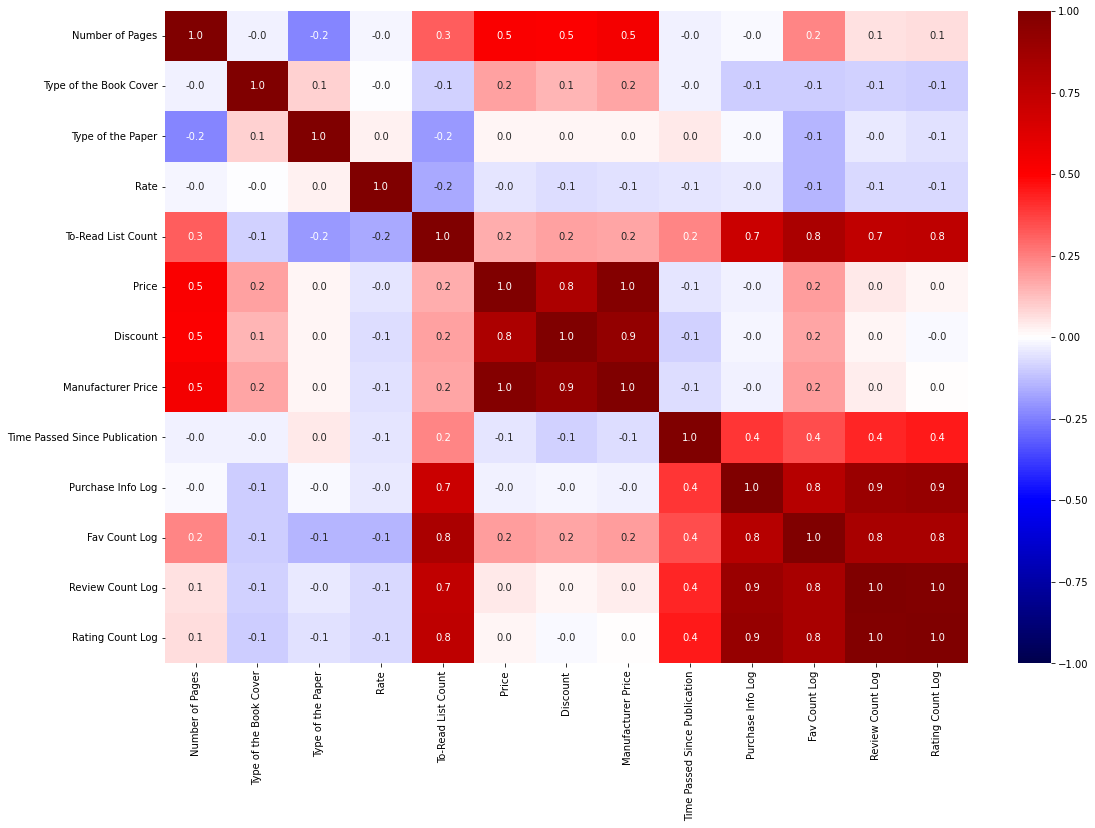

In [55]:
plt.figure(figsize=[18,12])
sns.heatmap(ky_lr.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.1f');

In [56]:
corr_matrix = ky_lr.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

C:\Users\sarif\AppData\Local\Temp\ipykernel_10124\2115042418.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [57]:
to_drop

['Manufacturer Price', 'Review Count Log', 'Rating Count Log']

In [58]:
X = ky_lr.drop(columns=['Review Count Log', "Manufacturer Price","Price"])
y = ky_lr.Price


X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train, x_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [59]:
lreg = LinearRegression()

lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

mse_cv = np.mean((pred - y_cv)**2)

print("Validation Score: ", lreg.score(x_cv, y_cv))
print("MSE: ", mse)

Validation Score:  0.6636590917565037
MSE:  22.076270063961136


In [60]:
lreg = LinearRegression()

lreg.fit(x_train,y_train)

pred = lreg.predict(x_test)

mse_test = np.mean((pred - y_test)**2)

print("Test Score: ", lreg.score(x_test, y_test))
print("MSE: ", mse)

Test Score:  0.7639735499919452
MSE:  22.076270063961136


In [61]:
print("Validation Score: ", lreg.score(x_cv, y_cv))
print("MSE: ", mse_cv)

print("Test Score: ", lreg.score(x_test, y_test))
print("MSE: ", mse_test)

Validation Score:  0.6636590917565037
MSE:  86.84602022272195
Test Score:  0.7639735499919452
MSE:  92.84619773983984


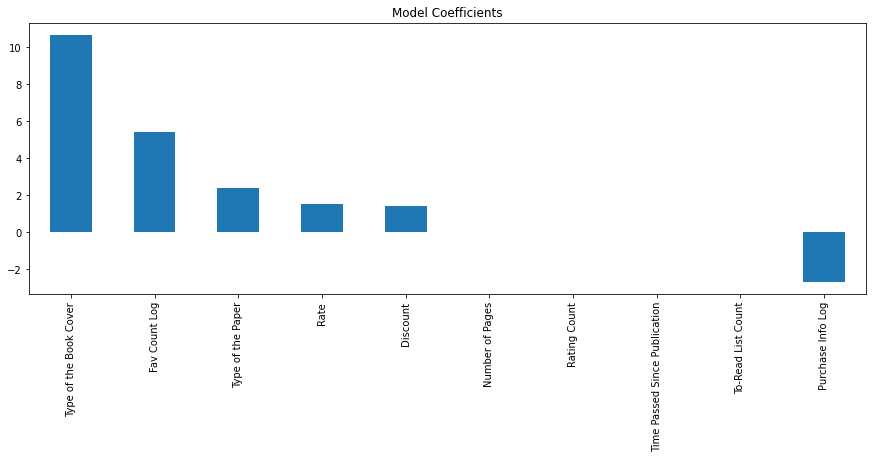

In [59]:
from pandas import Series

predictors = x_train.columns
coef = Series(lreg.coef_,predictors).sort_values(ascending=False)
plt.figure(figsize=[15,5])
coef.plot(kind='bar', title='Model Coefficients');